In [48]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Reading the Data
Data = pd.read_csv('mushroom.csv')
Data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [26]:
#Dropping the column named unnamed.
Data = Data.drop("Unnamed: 0", axis=1)

In [27]:
Data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [29]:
#Rearrange the table columns
Rearrange = ['cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat','stalk_height','cap_diameter','class']
Data = Data[Rearrange]

In [10]:
Data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,class
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,14.037532,12.545245,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,5.877891,17.464145,poisonous
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,6.500840,13.501957,poisonous
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,11.270020,poisonous
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,8.423199,poisonous


In [30]:
# Value Counts for Categorical Features
print(Data['cap_shape'].value_counts())
print(Data['cap_surface'].value_counts())
print(Data['cap_color'].value_counts())
print(Data['bruises'].value_counts())
print(Data['odor'].value_counts())
print(Data['gill_attachment'].value_counts())
print(Data['gill_spacing'].value_counts())
print(Data['gill_size'].value_counts())
print(Data['gill_color'].value_counts())
print(Data['cap_diameter'].value_counts())
print(Data['stalk_height'].value_counts())
print(Data['habitat'].value_counts())
print(Data['population'].value_counts())
print(Data['spore_print_color'].value_counts())
print(Data['ring_type'].value_counts())
print(Data['ring_number'].value_counts())
print(Data['veil_color'].value_counts())
print(Data['veil_type'].value_counts())
print(Data['stalk_color_below_ring'].value_counts())
print(Data['stalk_color_above_ring'].value_counts())
print(Data['stalk_surface_below_ring'].value_counts())
print(Data['stalk_surface_above_ring'].value_counts())
print(Data['stalk_root'].value_counts())
print(Data['stalk_shape'].value_counts())

sunken     439
flat       402
bell       397
convex     381
conical    381
Name: cap_shape, dtype: int64
scaly      568
smooth     513
fibrous    482
grooves    437
Name: cap_surface, dtype: int64
brown     263
green     241
yellow    228
gray      226
pink      221
buff      220
red       216
white     200
purple    185
Name: cap_color, dtype: int64
yes    1023
no      977
Name: bruises, dtype: int64
foul        274
anise       242
musty       239
fishy       228
spicy       226
pungent     212
almond      203
creosote    197
none        179
Name: odor, dtype: int64
free          540
notched       535
attached      487
descending    438
Name: gill_attachment, dtype: int64
distant    677
close      664
crowded    659
Name: gill_spacing, dtype: int64
narrow    1007
broad      993
Name: gill_size, dtype: int64
orange       216
black        192
green        183
purple       173
pink         168
buff         165
chocolate    161
gray         160
brown        152
yellow       151
white     

In [31]:
Data = Data.drop('gill_color',axis=1)
Data = Data.drop('cap_diameter',axis=1)
Data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,stalk_shape,stalk_root,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,class
0,sunken,scaly,white,no,anise,descending,distant,broad,tapering,cup,...,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,14.276173,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,enlarging,rooted,...,brown,universal,brown,two,sheathing,brown,numerous,waste,3.952715,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,tapering,cup,...,gray,universal,yellow,two,sheathing,purple,abundant,waste,9.054265,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,enlarging,club,...,pink,partial,yellow,two,cobwebby,green,clustered,grasses,5.226499,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,enlarging,missing,...,white,universal,white,none,none,yellow,clustered,urban,14.037532,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,tapering,bulbous,...,orange,partial,orange,one,flaring,purple,abundant,leaves,5.877891,poisonous
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,tapering,rhizomorphs,...,orange,partial,white,one,zone,yellow,numerous,waste,6.500840,poisonous
1997,convex,grooves,green,yes,fishy,notched,close,narrow,tapering,missing,...,red,partial,brown,two,evanescent,yellow,abundant,woods,13.558064,poisonous
1998,bell,smooth,white,no,pungent,free,close,narrow,enlarging,rooted,...,pink,universal,yellow,one,cobwebby,brown,solitary,woods,11.092703,poisonous


In [32]:
Data = Data.drop('stalk_height',axis=1)

In [33]:
Data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,stalk_shape,stalk_root,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,sunken,scaly,white,no,anise,descending,distant,broad,tapering,cup,...,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,enlarging,rooted,...,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible
2,flat,grooves,purple,yes,foul,descending,crowded,broad,tapering,cup,...,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous
3,bell,scaly,pink,yes,fishy,notched,close,broad,enlarging,club,...,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,enlarging,missing,...,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,tapering,bulbous,...,pink,orange,partial,orange,one,flaring,purple,abundant,leaves,poisonous
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,tapering,rhizomorphs,...,pink,orange,partial,white,one,zone,yellow,numerous,waste,poisonous
1997,convex,grooves,green,yes,fishy,notched,close,narrow,tapering,missing,...,brown,red,partial,brown,two,evanescent,yellow,abundant,woods,poisonous
1998,bell,smooth,white,no,pungent,free,close,narrow,enlarging,rooted,...,gray,pink,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous


In [36]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
Data['cap_shape'] = label_encoder.fit_transform(Data['cap_shape'])
Data['cap_surface'] = label_encoder.fit_transform(Data['cap_surface'])
Data['cap_color'] = label_encoder.fit_transform(Data['cap_color'])
Data['bruises'] = label_encoder.fit_transform(Data['bruises'])
Data['odor'] = label_encoder.fit_transform(Data['odor'])
Data['gill_attachment'] = label_encoder.fit_transform(Data['gill_attachment'])
Data['gill_spacing'] = label_encoder.fit_transform(Data['gill_spacing'])
Data['gill_size'] = label_encoder.fit_transform(Data['gill_size'])
Data['stalk_shape'] = label_encoder.fit_transform(Data['stalk_shape'])
Data['stalk_root'] = label_encoder.fit_transform(Data['stalk_root'])
Data['stalk_surface_above_ring'] = label_encoder.fit_transform(Data['stalk_surface_above_ring'])
Data['stalk_surface_below_ring'] = label_encoder.fit_transform(Data['stalk_surface_below_ring'])
Data['stalk_color_above_ring'] = label_encoder.fit_transform(Data['stalk_color_above_ring'])
Data['stalk_color_below_ring'] = label_encoder.fit_transform(Data['stalk_color_below_ring'])
Data['veil_type'] = label_encoder.fit_transform(Data['veil_type'])
Data['veil_color'] = label_encoder.fit_transform(Data['veil_color'])
Data['ring_number'] = label_encoder.fit_transform(Data['ring_number'])
Data['ring_type'] = label_encoder.fit_transform(Data['ring_type'])
Data['spore_print_color'] = label_encoder.fit_transform(Data['spore_print_color'])
Data['population'] = label_encoder.fit_transform(Data['population'])
Data['habitat'] = label_encoder.fit_transform(Data['habitat'])
Data['class'] = label_encoder.fit_transform(Data['class'])

In [37]:
Data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,stalk_shape,stalk_root,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,1,2,...,3,8,0,0,2,6,3,1,5,1
1,4,0,6,0,1,3,1,1,0,6,...,2,0,1,0,2,6,1,2,5,0
2,3,1,5,1,4,1,1,0,1,2,...,8,3,1,3,2,6,6,0,5,1
3,0,2,4,1,3,3,0,0,0,1,...,8,5,0,3,2,0,4,1,0,1
4,3,3,8,1,5,2,1,1,0,4,...,3,7,1,2,0,4,8,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,1,0,...,5,4,0,1,1,2,6,0,1,1
1996,4,2,5,1,5,0,2,1,1,5,...,5,4,0,2,1,7,8,2,5,1
1997,2,1,3,1,3,3,0,1,1,4,...,0,6,0,0,2,1,8,0,6,1
1998,0,3,7,0,7,2,0,1,0,6,...,3,5,1,3,1,0,1,5,6,1


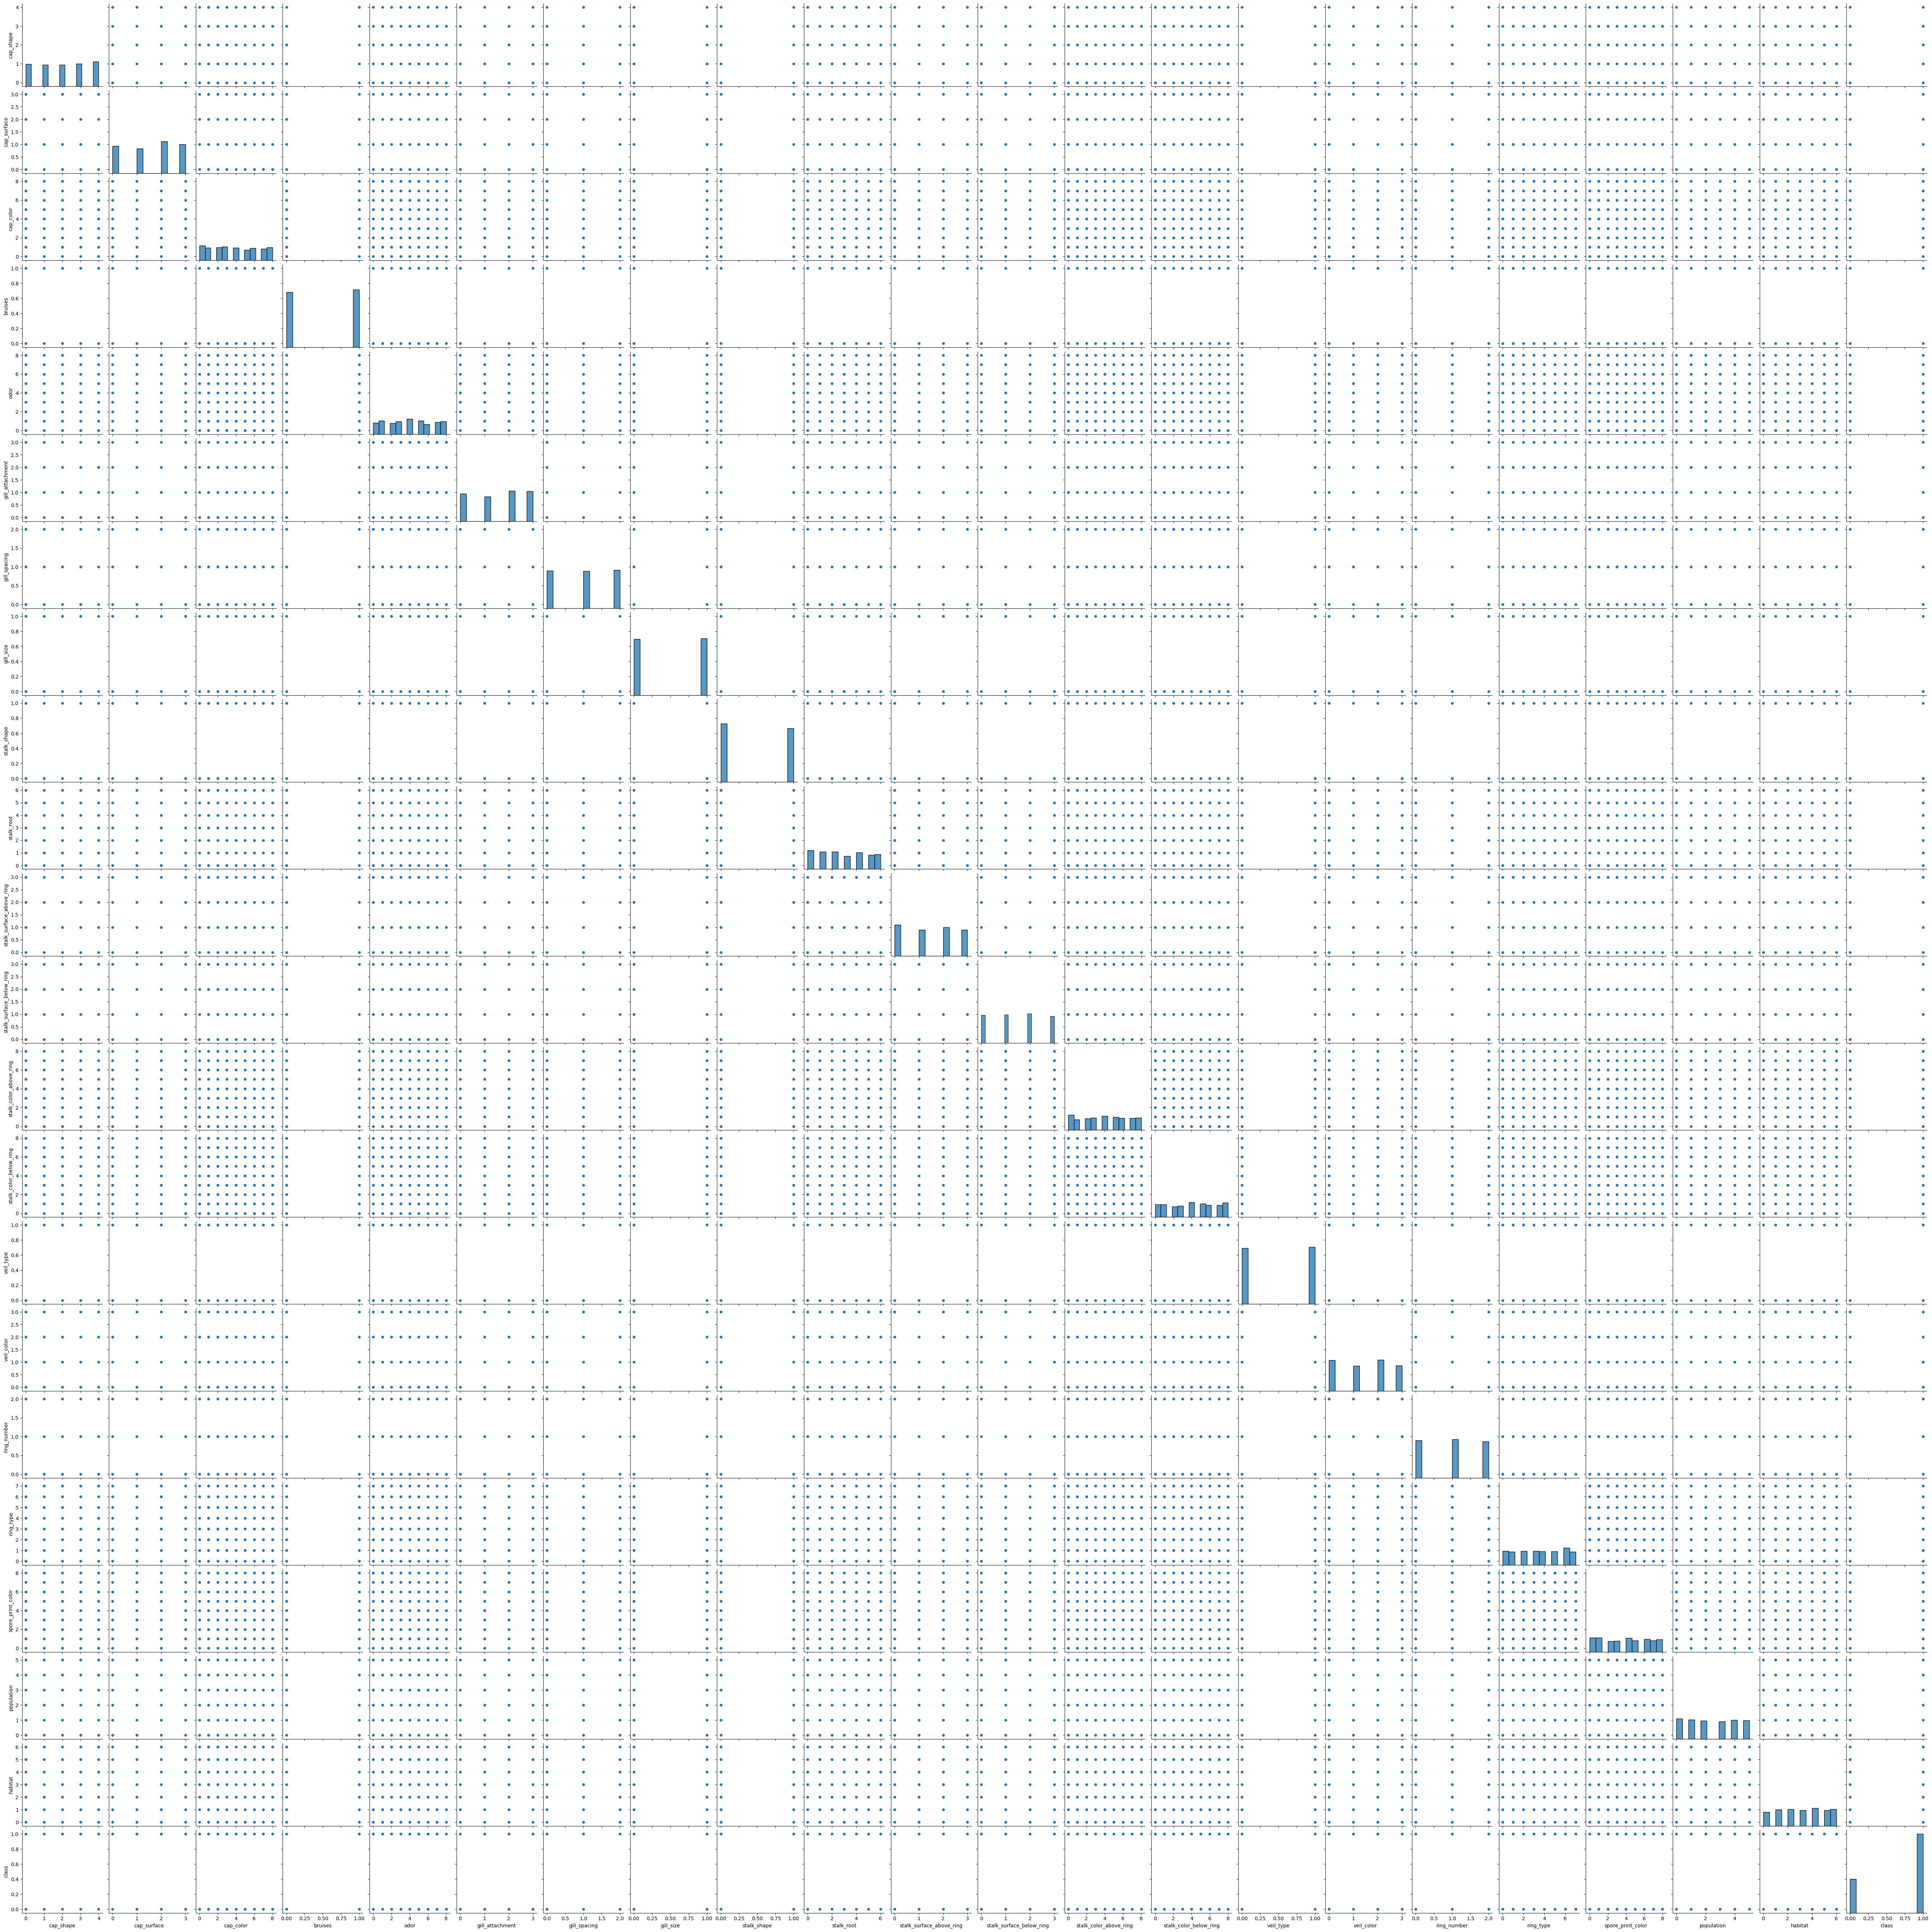

In [51]:
# Create a pairplot
sns.pairplot(Data)
plt.show()

In [52]:
Data.corr()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,stalk_shape,stalk_root,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
cap_shape,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.011573,0.057405,...,-0.021350,0.027522,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140
cap_surface,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,-0.024032,-0.008284,...,-0.048534,-0.011742,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409
cap_color,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.020397,-0.004423,...,0.038920,0.036951,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029
bruises,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,0.007928,-0.014604,...,0.009374,-0.077316,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498
odor,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,0.009072,-0.005430,...,-0.006393,-0.007103,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536
gill_attachment,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,-0.018698,-0.013484,...,0.011811,0.007839,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194
gill_spacing,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,0.051041,0.000668,...,-0.045491,0.003012,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505
gill_size,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.046759,0.079320,...,-0.067307,-0.025614,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858
stalk_shape,0.011573,-0.024032,-0.020397,0.007928,0.009072,-0.018698,0.051041,-0.046759,1.000000,-0.036714,...,0.025740,0.046013,0.004404,-0.051294,0.014983,0.011554,0.027410,-0.000393,-0.054938,0.024023
stalk_root,0.057405,-0.008284,-0.004423,-0.014604,-0.005430,-0.013484,0.000668,0.079320,-0.036714,1.000000,...,-0.024016,-0.000029,0.001088,-0.016711,-0.025376,0.002006,-0.018022,-0.001400,0.003239,0.054233


In [55]:
#Spliting original data set into train and test set
array = Data.values
X = array[:,0:21]
Y = array[:,21]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [56]:
Y

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [57]:
X

array([[4, 2, 7, ..., 3, 1, 5],
       [4, 0, 6, ..., 1, 2, 5],
       [3, 1, 5, ..., 6, 0, 5],
       ...,
       [2, 1, 3, ..., 8, 0, 6],
       [0, 3, 7, ..., 1, 5, 6],
       [2, 2, 8, ..., 7, 2, 4]], dtype=int64)

In [58]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1400, 21), (1400,), (600, 21), (600,))

In [59]:
#Creating SVC model
clf = SVC()
clf.fit(X_train,Y_train)

SVC()

In [60]:
#Predicting Y values with X_test values
Y_predict = clf.predict(X_test)

In [61]:
#comparing the accuracy between original Y_test data and predicted Y data
accuracy_score(Y_test,Y_predict)

0.715

In [64]:
#Checking the model score in with the prediction score
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.75      0.08      0.15       181
           1       0.71      0.99      0.83       419

    accuracy                           0.71       600
   macro avg       0.73      0.54      0.49       600
weighted avg       0.72      0.71      0.62       600



In [65]:
#To fined best features using grid search
clf = SVC()

param_grid = [{'kernel':['linear','rbf'],'gamma':[0.1,0.5,1],'C':[0.01,0.1,1] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=6,)
gsv.fit(X_test,Y_test)

RandomizedSearchCV(cv=6, estimator=SVC(),
                   param_distributions=[{'C': [0.01, 0.1, 1],
                                         'gamma': [0.1, 0.5, 1],
                                         'kernel': ['linear', 'rbf']}])

In [66]:
gsv.best_params_ , gsv.best_score_ 

({'kernel': 'rbf', 'gamma': 1, 'C': 1}, 0.775)

In [67]:
clf_model = SVC(kernel='linear',C=1)
clf_model.fit(X_train , Y_train)
y_pred = clf_model.predict(X_test)
acc = accuracy_score(Y_test, Y_predict) * 100
print("Accuracy =", acc)

Accuracy = 71.5


In [68]:
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [70]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.75      0.08      0.15       181
           1       0.71      0.99      0.83       419

    accuracy                           0.71       600
   macro avg       0.73      0.54      0.49       600
weighted avg       0.72      0.71      0.62       600

